<a href="https://colab.research.google.com/github/Chintan-29/student_enrolment/blob/main/student_enrollment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-drop-out-prediction/train.csv
/kaggle/input/students-drop-out-prediction/test.csv


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [ ]:
train=pd.read_csv('../input/students-drop-out-prediction/train.csv')
test=pd.read_csv('../input/students-drop-out-prediction/test.csv')

In [ ]:
train.shape, test.shape

((3796, 43), (1628, 42))

In [ ]:
X=train.drop(['label','id'], axis=1)
y=train['label']
x_test=test.drop(['id'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
binary=['v_1','v_26','v_11','v_14','v_28','v_30','v_9','v_27']
nominal=['v_32','v_4','v_3','v_20','v_21','v_18','v_25','v_12']
ordinal=['v_31','v_15','v_19','v_13','v_33','v_17','v_29','v_23','v_6','v_24','v_10','v_5','v_22','v_0']
ratio=['v_16','v_8','v_2','v_7','v_34','v_35','v_36','v_37','v_38','v_39','v_40']
scale=['v_16','v_8','v_2','v_7','v_34','v_35','v_36','v_37','v_38','v_39','v_40','v_31','v_15','v_19','v_13','v_33','v_17','v_29','v_23','v_6','v_24','v_10','v_5','v_22','v_0','v_32','v_4','v_3','v_20','v_21','v_18','v_25','v_12']
ordinal_nominal=['v_31','v_15','v_19','v_13','v_33','v_17','v_29','v_23','v_6','v_24','v_10','v_5','v_22','v_0','v_32','v_4','v_3','v_20','v_21','v_18','v_25','v_12']

In [ ]:
mms=MinMaxScaler()
ssc=StandardScaler()
ohe=OneHotEncoder()
xtrain[scale]=ssc.fit_transform(xtrain[scale])

In [ ]:
xtest[scale]=ssc.transform(xtest[scale])
x_test[scale]=ssc.transform(x_test[scale])

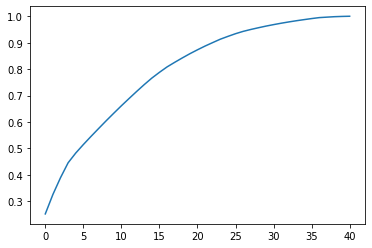

In [ ]:
from sklearn.decomposition import PCA
  
pca = PCA()
pca.fit(xtrain)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_variance)

In [ ]:
pca_final = PCA(0.98)
train_pca = pca_final.fit_transform(xtrain)
test_pca=pca_final.transform(xtest)

In [ ]:
LR = LogisticRegression()
LR_pca=LR.fit(train_pca,ytrain)
yp1=LR_pca.predict(test_pca)
f1_score(ytest,yp1,average='micro')

0.7263157894736842

In [ ]:
train_pca.shape

(3036, 34)

In [ ]:
lr=LR.fit(xtrain,ytrain)
yp2=lr.predict(xtest)
f1_score(ytest,yp1,average='micro')

0.7263157894736842

In [ ]:
xtrain.shape,ytrain.shape

((3036, 41), (3036,))

In [ ]:
rf=RandomForestClassifier()
base=rf.fit(train_pca,ytrain)
yp=base.predict(test_pca)
f1_score(ytest,yp,average='micro')

0.6881578947368421

In [ ]:
rf=RandomForestClassifier()
base=rf.fit(xtrain,ytrain)
yp3=base.predict(xtest)
f1_score(ytest,yp3,average='micro')

0.7368421052631579

In [ ]:
'''param={'bootstrap': [True, False],
     'max_depth': [10, 40, 70, None],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],
     'n_estimators': [ 400, 800, 1000, 1200]}
rf_2 = RandomForestClassifier()
rf_g = GridSearchCV(estimator = rf_2, param_grid = param,  cv = 2, verbose=2)
rf_g.fit(xtrain1, ytrain)
yp_4=rf_g.predict(xtest1)
f1_score(ytest,yp_4, average='micro')'''
rf1=RandomForestClassifier(n_estimators=1200,bootstrap=False,max_depth=40,max_features='auto',min_samples_leaf=1, min_samples_split=2)

In [ ]:
rf2=RandomForestClassifier(n_estimators=1200,bootstrap=False,max_depth=40,max_features='sqrt',min_samples_leaf=1, min_samples_split=2)

In [ ]:
bg1=BaggingClassifier(base_estimator=RandomForestClassifier())
bg1=bg1.fit(xtrain,ytrain)
yp6=bg1.predict(xtest)
f1_score(ytest,yp6,average='micro')

0.731578947368421

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=50,base_estimator=RandomForestClassifier())
ad=ad.fit(xtrain,ytrain)
yp7=ad.predict(xtest)
f1_score(ytest,yp7,average='micro')

0.7289473684210527

In [ ]:
ad1=AdaBoostClassifier(n_estimators=50,base_estimator=rf1)
ad1=ad1.fit(xtrain,ytrain)
yp8=ad1.predict(xtest)
f1_score(ytest,yp8,average='micro')

0.7407894736842106

In [ ]:
ad1=AdaBoostClassifier(n_estimators=50,base_estimator=rf2)
ad1=ad1.fit(xtrain,ytrain)
yhat_1=ad1.predict(xtest)
f1_score(ytest,yhat_1,average='micro')

0.7407894736842106

In [ ]:
ad1=AdaBoostClassifier(n_estimators=50,base_estimator=rf1)
ad1=ad1.fit(train_pca,ytrain)
yhat_2=ad1.predict(test_pca)
f1_score(ytest,yhat_2,average='micro')

0.6947368421052632

In [ ]:
ad3=AdaBoostClassifier(n_estimators=20,base_estimator=rf2)
ad3=ad3.fit(xtrain,ytrain)
yhat_3=ad3.predict(xtest)
f1_score(ytest,yhat_3,average='micro')

0.7421052631578947

In [ ]:
ad4=AdaBoostClassifier(n_estimators=10,base_estimator=rf1)
ad4=ad4.fit(xtrain,ytrain)
yhat_4=ad4.predict(xtest)
f1_score(ytest,yhat_4,average='micro')

0.7434210526315789

In [ ]:
ad5=AdaBoostClassifier(n_estimators=5,base_estimator=rf2)
ad5=ad5.fit(xtrain,ytrain)
yhat_5=ad5.predict(xtest)
f1_score(ytest,yhat_5,average='micro')

0.7394736842105263

In [ ]:
label=ad5.predict(x_test)

In [ ]:
test["label"] = label
submission = test[["id", "label"]]

submission.to_csv("submission.csv", index = False)